In [2]:
# importing important libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Extracting dataset into a variable
boston_dataset=load_boston()

In [5]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [6]:
#data :contains the information for various houses
# target: prices of the house
#feature_names : names of the features
# DESCR : describe the dataset

In [11]:
boston_dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [7]:
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s


In [ ]:
# positive:RM,RAD ,MEDV
# negetive:CRIM,NOX,TAX,LSTAT
# non:PTRATIO,B

In [21]:
#loading dataset into 
boston=pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
boston['MEDV']=boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


c:\users\sandeep\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

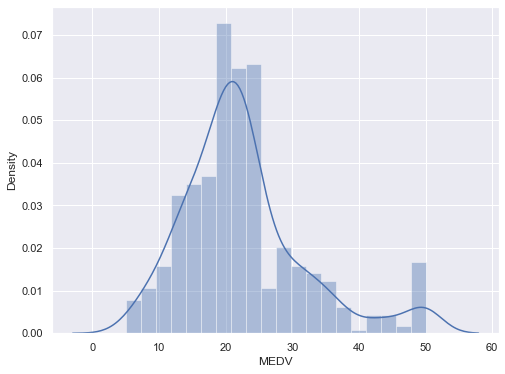

In [25]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(boston["MEDV"],bins=20)
plt.show

In [27]:
# removing outliers
boston.drop(boston.index[list((np.where(boston["MEDV"]>39)))], inplace=True)

c:\users\sandeep\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


c:\users\sandeep\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

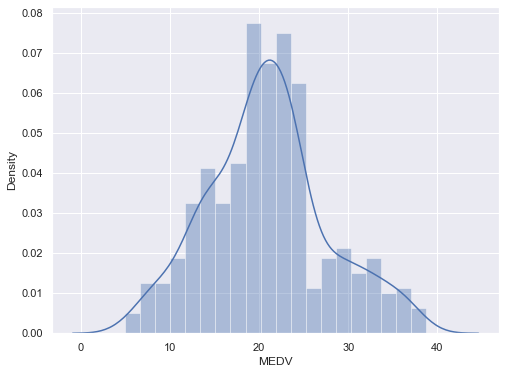

In [28]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(boston["MEDV"],bins=20)
plt.show

<AxesSubplot:>

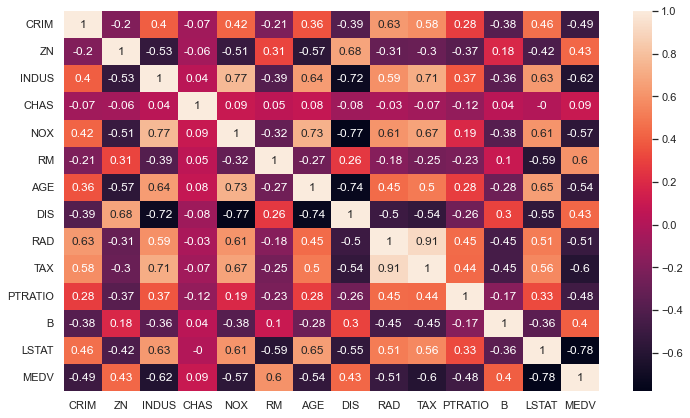

In [30]:
# correlation matrix 
cm=boston.corr().round(2)
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(data=cm, annot=True)

In [31]:
boston.drop(boston.index[list((np.where(boston["LSTAT"]>25)))], inplace=True)

c:\users\sandeep\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


c:\users\sandeep\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

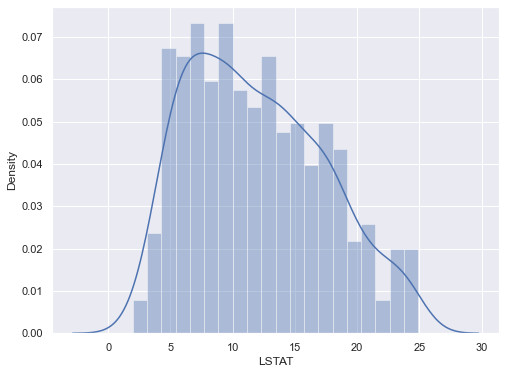

In [32]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(boston["LSTAT"],bins=20)
plt.show

In [33]:
boston.drop(boston.index[list((np.where(boston["LSTAT"]>20)))], inplace=True)

c:\users\sandeep\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


c:\users\sandeep\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

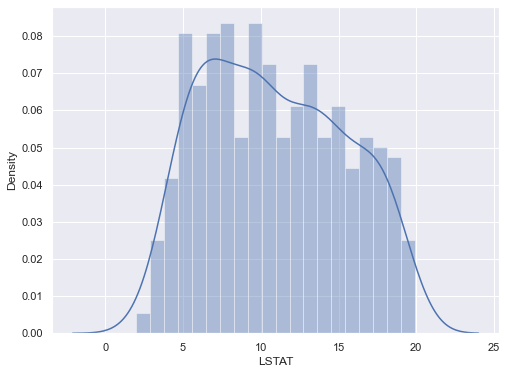

In [34]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(boston["LSTAT"],bins=20)
plt.show

c:\users\sandeep\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

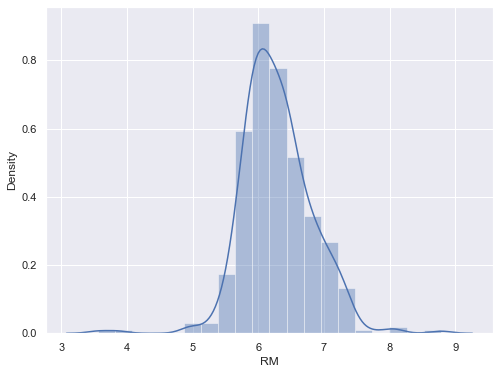

In [35]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(boston["RM"],bins=20)
plt.show

In [2]:
# Scatter plot between input and output feature 
plt.figure(figsize=(20,5))

features= ["LSTAT","RM"]
target=boston["MEDV"]
for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x= boston[col]
    y= target
    plt.scatter(x,y,marker="o")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("MEDV")

NameError: name 'plt' is not defined

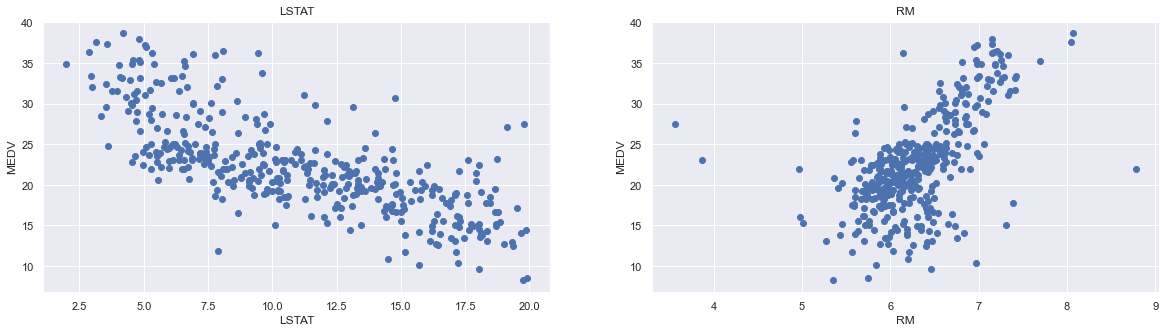

In [42]:
# Scatter Plot between input and output features
plt.figure(figsize = (20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker = 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


In [43]:
# The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
# The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.


In [46]:
#seperating x and y
X=pd.DataFrame(np.c_[boston['LSTAT'],boston['RM']],columns=['LSTAT','RM'])
y=boston['MEDV']

In [47]:
X_train , X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=5)

In [48]:
# Building the linear REgression Model
lin_model =LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [50]:
# MOdel Evaluation
y_train_predict=lin_model.predict(X_train)
rmse=(np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2=r2_score(y_train,y_train_predict)
print('The model performance for training set :')
print("\n")
print("RMSE is {}".format(rmse))
print('r2 score is {}'.format(r2))
print("\n")

The model performance for training set :


RMSE is 3.588481214002953
r2 score is 0.6249869262982906




In [ ]:
y_test_predict=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared))